# Scenario analysis

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from model.model_nile import ModelNile
from experimentation.data_generation import generate_input_data
from plotter import HydroModelPlotter

import matplotlib
import matplotlib.font_manager as fm

sns.set(font_scale=1.2)

fm.fontManager.addfont('Minion Pro Regular.ttf')
matplotlib.rc('font', family='Minion Pro')

from matplotlib import rcParams
rcParams["font.family"] = "Minion Pro"
rcParams["font.sans-serif"] = "Minion Pro"

Read the results of the open exploration:

In [3]:
experiments = pd.read_csv("../outputs/experiments_exploration.csv").drop(columns="Unnamed: 0")
outcomes = pd.read_csv("../outputs/outcomes_exploration.csv").drop(columns="Unnamed: 0")

In [4]:
outcomes["policy"] = experiments["policy"]

In [5]:
# policies = experiments['policy']

# data = outcomes
# data['policy'] = policies

# sns.pairplot(data, hue='policy', vars=outcomes.keys(), diag_kind='hist',plot_kws={"s": 5},palette="viridis")
# plt.xticks(rotation=45)
# plt.show()


In [6]:
experiments.iloc[:,:7]

,atbara_dev_coef,atbara_mean_coef,blue_nile_dev_coef,blue_nile_mean_coef,white_nile_dev_coef,white_nile_mean_coef,yearly_demand_growth_rate
0,0.900605,0.776880,1.202402,0.997331,1.267372,1.239588,0.018419
1,0.848363,1.114484,1.392142,0.893860,1.018906,0.865233,0.019154
2,1.376981,0.861442,1.180153,1.055651,0.524763,0.973695,0.012634
3,1.067817,0.777850,0.719747,0.777996,1.279631,0.912673,0.029702
4,1.225215,1.110503,1.062273,0.813643,0.750684,0.888514,0.012937
...,...,...,...,...,...,...,...
14995,0.515117,1.080099,1.337346,1.011416,0.632053,1.096909,0.017961
14996,0.734474,0.961448,0.652504,1.152160,1.443176,1.127996,0.028750
14997,1.092854,1.224335,0.868930,1.188934,1.130032,1.199540,0.025406
14998,0.801764,1.104937,0.999552,0.872480,1.338876,0.892909,0.026941


In [7]:
experiments.iloc[:,[0,1,2,3,4,5,6,-2]]

,atbara_dev_coef,atbara_mean_coef,blue_nile_dev_coef,blue_nile_mean_coef,white_nile_dev_coef,white_nile_mean_coef,yearly_demand_growth_rate,policy
0,0.900605,0.776880,1.202402,0.997331,1.267372,1.239588,0.018419,best_ethiopia
1,0.848363,1.114484,1.392142,0.893860,1.018906,0.865233,0.019154,best_ethiopia
2,1.376981,0.861442,1.180153,1.055651,0.524763,0.973695,0.012634,best_ethiopia
3,1.067817,0.777850,0.719747,0.777996,1.279631,0.912673,0.029702,best_ethiopia
4,1.225215,1.110503,1.062273,0.813643,0.750684,0.888514,0.012937,best_ethiopia
...,...,...,...,...,...,...,...,...
14995,0.515117,1.080099,1.337346,1.011416,0.632053,1.096909,0.017961,compromise_threshold
14996,0.734474,0.961448,0.652504,1.152160,1.443176,1.127996,0.028750,compromise_threshold
14997,1.092854,1.224335,0.868930,1.188934,1.130032,1.199540,0.025406,compromise_threshold
14998,0.801764,1.104937,0.999552,0.872480,1.338876,0.892909,0.026941,compromise_threshold


In [8]:
out_dict = dict()
for col in outcomes.iloc[:,:-1].columns:
    out_dict[col] = np.array(outcomes[col])
out_dict
del out_dict["sudan_90"]

In [9]:
# from ema_workbench.analysis import feature_scoring
# import numpy as np
# np.random.seed(123)

# scores = feature_scoring.get_feature_scores_all(experiments.iloc[:,[0,1,2,3,4,5,6,-2]], out_dict, nr_trees=1000)

# scores

In [10]:
# scores=scores.iloc[[4,0,1,2,3,5,6,7]]

In [11]:
# pd.set_option('display.float_format','{:.2f}'.format)
# pd.set_option('precision', 2)
# scores.columns = ['Egypt Irr. Deficit','Egypt $90^{th}$ Irr. Deficit','Egypt Low HAD','Sudan Irr. Deficit','Ethiopia Hydropower']
# scores = scores.set_index(pd.Series(['Policy','Atbara Deviation Multiplier', 'Atbara Mean Multiplier',
#                    'Blue Nile Deviation Multiplier', 'Blue Nile Mean Multiplier',
#                    'White Nile Deviation Multiplier', 'White Nile Mean Multiplier',
#                            'Demand Growth Rate']))
# scores.index.name = None
# #scores=round(scores,2)
# scores.style.background_gradient(axis=None)

In [12]:
# scores.index

In [13]:
from ema_workbench.analysis import dimensional_stacking

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive "


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


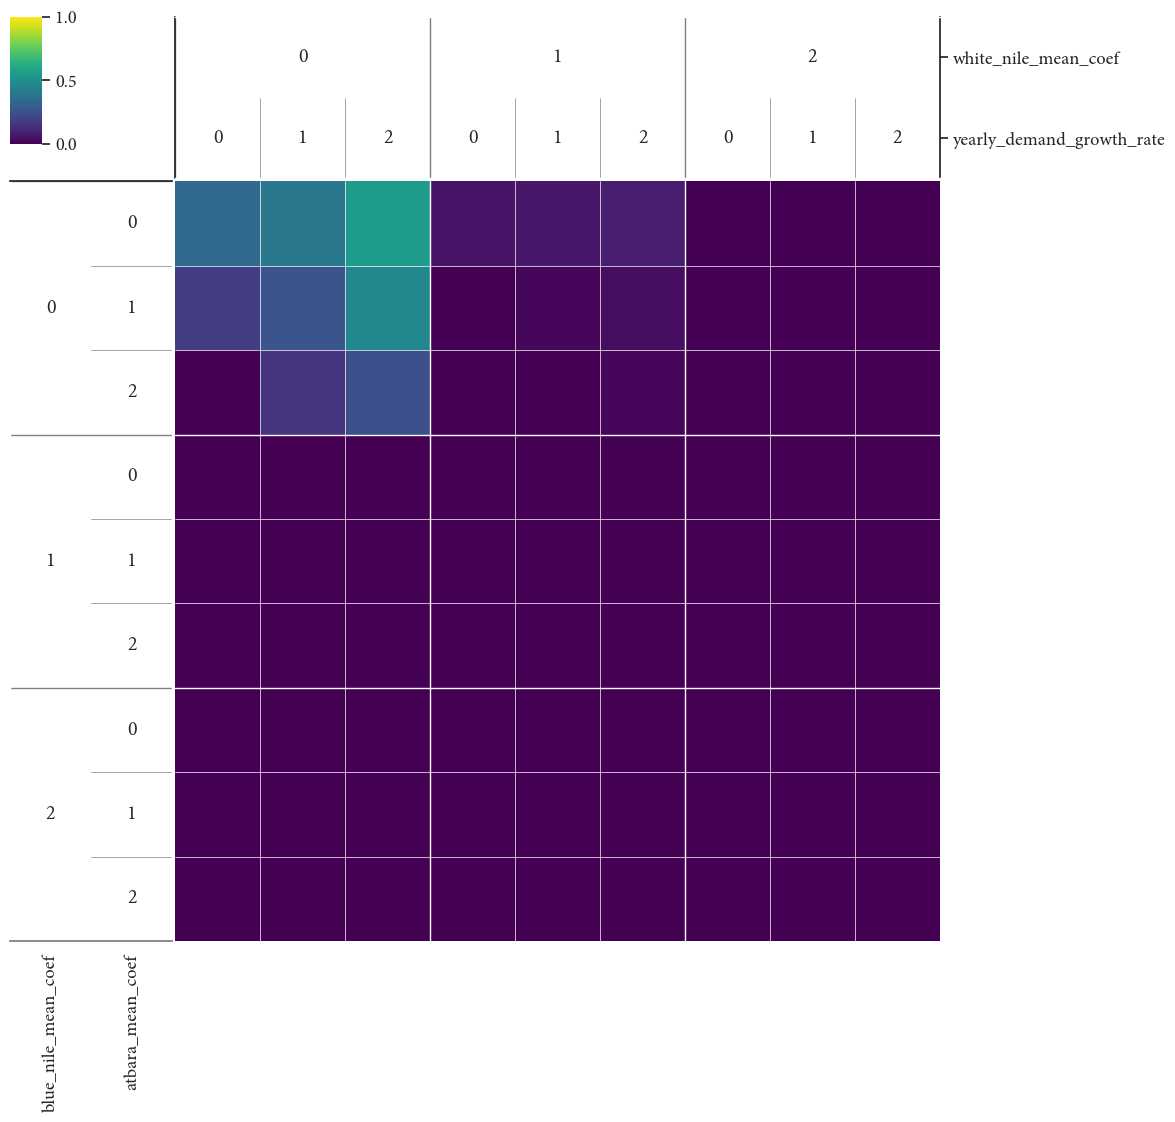

In [14]:
# from ema_workbench.analysis import dimensional_stacking

x = experiments.iloc[:,:7]
y = outcomes["sudan_irr"] > np.percentile(outcomes["sudan_irr"],70)
dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3, fsize=(12,12))
plt.show()

Let's check the robustness of policies by calculating the maximum regret metric across scenarios:

In [15]:
experiments

,atbara_dev_coef,atbara_mean_coef,blue_nile_dev_coef,blue_nile_mean_coef,white_nile_dev_coef,white_nile_mean_coef,yearly_demand_growth_rate,v0,v1,v2,...,v157,v158,v159,v160,v161,v162,v163,scenario,policy,model
0,0.900605,0.776880,1.202402,0.997331,1.267372,1.239588,0.018419,0.031535,0.337122,0.487280,...,0.077558,0.430239,0.258722,0.211918,0.766847,0.212388,0.164798,0,best_ethiopia,NileProblem
1,0.848363,1.114484,1.392142,0.893860,1.018906,0.865233,0.019154,0.031535,0.337122,0.487280,...,0.077558,0.430239,0.258722,0.211918,0.766847,0.212388,0.164798,1,best_ethiopia,NileProblem
2,1.376981,0.861442,1.180153,1.055651,0.524763,0.973695,0.012634,0.031535,0.337122,0.487280,...,0.077558,0.430239,0.258722,0.211918,0.766847,0.212388,0.164798,2,best_ethiopia,NileProblem
3,1.067817,0.777850,0.719747,0.777996,1.279631,0.912673,0.029702,0.031535,0.337122,0.487280,...,0.077558,0.430239,0.258722,0.211918,0.766847,0.212388,0.164798,3,best_ethiopia,NileProblem
4,1.225215,1.110503,1.062273,0.813643,0.750684,0.888514,0.012937,0.031535,0.337122,0.487280,...,0.077558,0.430239,0.258722,0.211918,0.766847,0.212388,0.164798,4,best_ethiopia,NileProblem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.515117,1.080099,1.337346,1.011416,0.632053,1.096909,0.017961,0.034499,0.343644,0.555503,...,0.134984,0.626931,0.879468,0.213362,0.288037,0.646109,0.716940,2995,compromise_threshold,NileProblem
14996,0.734474,0.961448,0.652504,1.152160,1.443176,1.127996,0.028750,0.034499,0.343644,0.555503,...,0.134984,0.626931,0.879468,0.213362,0.288037,0.646109,0.716940,2996,compromise_threshold,NileProblem
14997,1.092854,1.224335,0.868930,1.188934,1.130032,1.199540,0.025406,0.034499,0.343644,0.555503,...,0.134984,0.626931,0.879468,0.213362,0.288037,0.646109,0.716940,2997,compromise_threshold,NileProblem
14998,0.801764,1.104937,0.999552,0.872480,1.338876,0.892909,0.026941,0.034499,0.343644,0.555503,...,0.134984,0.626931,0.879468,0.213362,0.288037,0.646109,0.716940,2998,compromise_threshold,NileProblem


In [16]:
outcomes

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro,policy
0,19335.469854,342.194239,0.000000,0.0,0.0,6.571637e+07,best_ethiopia
1,28478.857214,422.721485,0.000000,0.0,0.0,5.285518e+07,best_ethiopia
2,11998.017821,207.781731,0.000000,0.0,0.0,7.354233e+07,best_ethiopia
3,81292.162794,839.678029,0.220833,0.0,0.0,4.012554e+07,best_ethiopia
4,11360.280411,181.140853,0.000000,0.0,0.0,4.385199e+07,best_ethiopia
...,...,...,...,...,...,...,...
14995,23390.109481,401.251527,0.000000,0.0,0.0,6.749773e+07,compromise_threshold
14996,39100.097087,604.369005,0.000000,0.0,0.0,8.772009e+07,compromise_threshold
14997,21024.834449,278.394790,0.000000,0.0,0.0,9.318815e+07,compromise_threshold
14998,62465.119045,847.213665,0.000000,0.0,0.0,5.041862e+07,compromise_threshold


In [17]:
def calculate_max_regret(objective_vector, direction):
    if direction == "min":
        best = np.percentile(
            objective_vector, 10, interpolation="closest_observation"
        )
        worst = max(objective_vector)
    elif direction == "max":
        best = np.percentile(
            objective_vector, 90, interpolation="closest_observation"
        )
        worst = min(objective_vector)
        
    return abs(best-worst)

In [18]:
directions = ["min","min","min","min","min","max"]
overall_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    
    logical = outcomes['policy']==policy
    
    for i, outcome in enumerate(outcomes.columns[:6]):
        value  = outcomes[outcome][logical]
        regret = calculate_max_regret(value, directions[i])
        scores[outcome] = regret
    overall_scores[policy] = scores
scores = pd.DataFrame.from_dict(overall_scores).T
scores

<ipython-input-17-f31db07a7cf9>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  best = np.percentile(
<ipython-input-17-f31db07a7cf9>:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  best = np.percentile(


,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro
best_egypt_90,91608.303381,1439.734136,0.704167,926.842754,0.0,8.914047e+07
best_egypt_aggregate,80146.085702,1178.002170,0.708333,3381.179699,0.0,8.723307e+07
best_ethiopia,86991.579240,947.138292,0.662500,11.201236,0.0,5.773730e+07
compromise_percentile,85773.056054,1306.660957,0.741667,786.451043,0.0,8.735939e+07
compromise_threshold,76712.599934,1088.528062,0.720833,3009.991730,0.0,8.682180e+07


In [19]:
ordered_regret = scores.iloc[:,[0,1,2,3,5]].loc[["best_egypt_aggregate",
                               "best_egypt_90",
                               "best_ethiopia",
                               "compromise_percentile",
                               "compromise_threshold"]]

best_egypt_aggregate                       Best Egypt Irr
best_egypt_90                        Best Egypt 90$^{th}$
best_ethiopia                    Best Ethiopia Hydropower
compromise_percentile    Compromise: Percentile Threshold
compromise_threshold       Compromise: Absolute Threshold
Name: Name, dtype: object


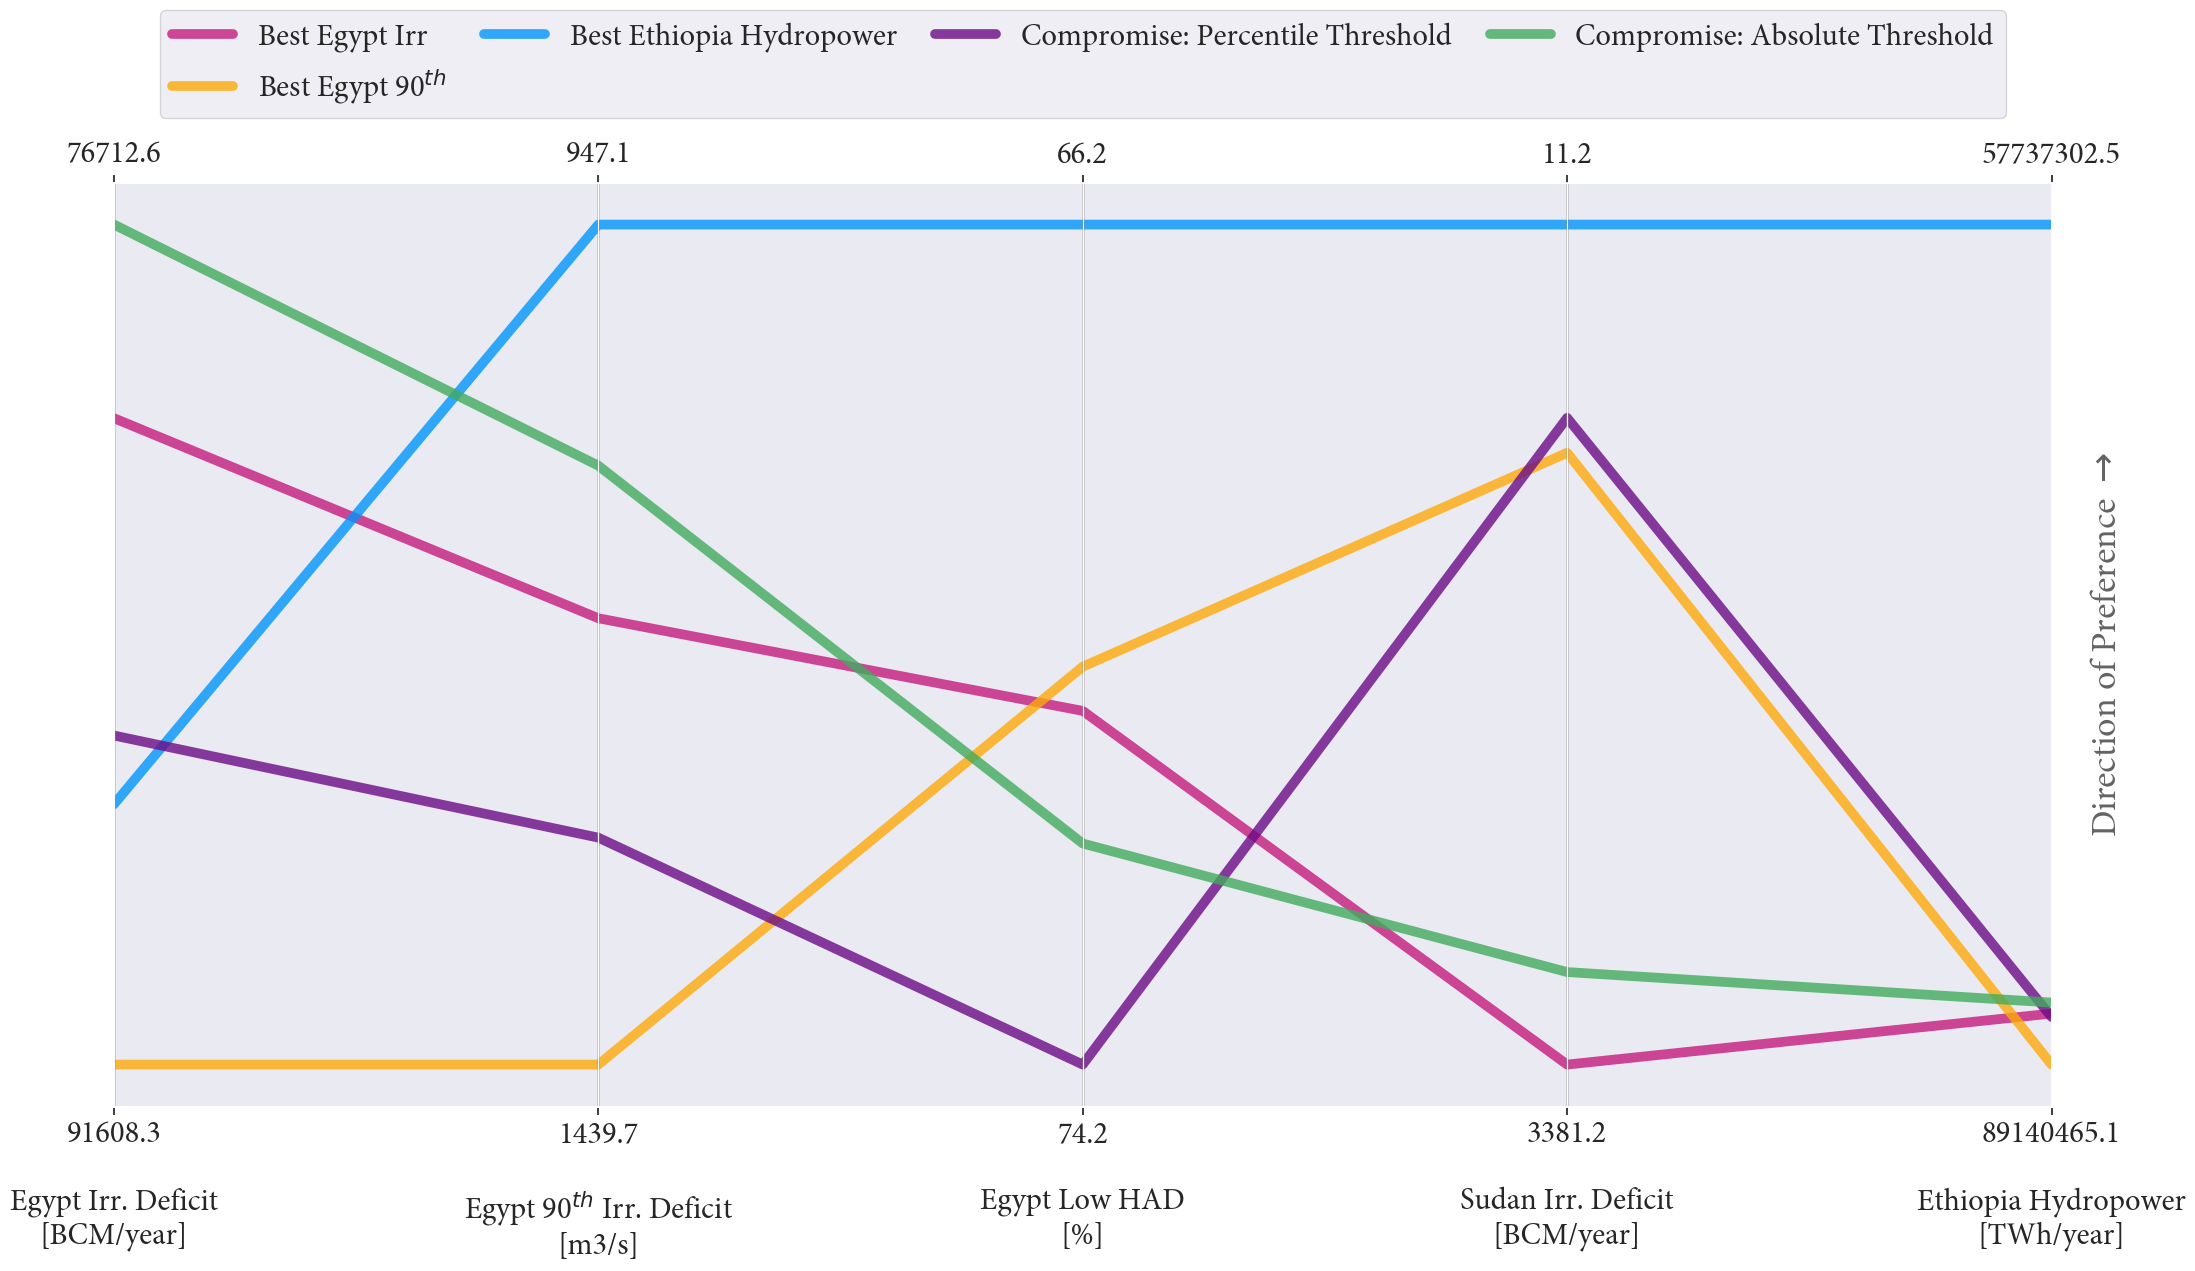

In [20]:
from plotter import parallel_plots_few_policies

solution_names = ["Best Egypt Irr", "Best Egypt 90$^{th}$","Best Ethiopia Hydropower",
                  "Compromise: Percentile Threshold", "Compromise: Absolute Threshold"]

parallel_plots_few_policies(ordered_regret, solution_names=solution_names)